In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
#import seaborn as sns


# Read the CSV and Perform Basic Data Cleaning

In [7]:
df = pd.read_csv("exoplanet_data.csv")
#Drop the null columns where all values are null
df = df.dropna(axis='columns', how='all')
# Drop the null rows
df = df.dropna()
df

,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,CONFIRMED,0.0,0.0,0.0,0.0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,FALSE POSITIVE,0.0,1.0,0.0,0.0,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,...,-176.0,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
2,FALSE POSITIVE,0.0,1.0,0.0,0.0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,...,-174.0,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
3,CONFIRMED,0.0,0.0,0.0,0.0,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,...,-211.0,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
4,CONFIRMED,0.0,0.0,0.0,0.0,4.134435,1.050000e-05,-1.050000e-05,172.979370,0.001900,...,-232.0,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6986,FALSE POSITIVE,0.0,0.0,0.0,1.0,8.589871,1.846000e-04,-1.846000e-04,132.016100,0.015700,...,-152.0,4.296,0.231,-0.189,1.088,0.313,-0.228,298.74921,46.973351,14.478
6987,FALSE POSITIVE,0.0,1.0,1.0,0.0,0.527699,1.160000e-07,-1.160000e-07,131.705093,0.000170,...,-166.0,4.529,0.035,-0.196,0.903,0.237,-0.079,297.18875,47.093819,14.082
6988,CANDIDATE,0.0,0.0,0.0,0.0,1.739849,1.780000e-05,-1.780000e-05,133.001270,0.007690,...,-220.0,4.444,0.056,-0.224,1.031,0.341,-0.114,286.50937,47.163219,14.757
6989,FALSE POSITIVE,0.0,0.0,1.0,0.0,0.681402,2.430000e-06,-2.430000e-06,132.181750,0.002850,...,-236.0,4.447,0.056,-0.224,1.041,0.341,-0.114,294.16489,47.176281,15.385


# Select your features (columns)

In [63]:
# Assign data to X 
# Sklearn requieres two dimensional array values
# So we use reshape to crete it
# Set features. This will also be used as your x values.
X = df[['koi_fpflag_nt', 'koi_fpflag_ss', 'koi_fpflag_co', 'koi_fpflag_ec', 'koi_period', 'koi_time0bk', 'koi_impact', 'koi_duration']]
X

,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_time0bk,koi_impact,koi_duration
0,0.0,0.0,0.0,0.0,54.418383,162.513840,0.586,4.50700
1,0.0,1.0,0.0,0.0,19.899140,175.850252,0.969,1.78220
2,0.0,1.0,0.0,0.0,1.736952,170.307565,1.276,2.40641
3,0.0,0.0,0.0,0.0,2.525592,171.595550,0.701,1.65450
4,0.0,0.0,0.0,0.0,4.134435,172.979370,0.762,3.14020
...,...,...,...,...,...,...,...,...
6986,0.0,0.0,0.0,1.0,8.589871,132.016100,0.765,4.80600
6987,0.0,1.0,1.0,0.0,0.527699,131.705093,1.252,3.22210
6988,0.0,0.0,0.0,0.0,1.739849,133.001270,0.043,3.11400
6989,0.0,0.0,1.0,0.0,0.681402,132.181750,0.147,0.86500



# Defining the Target

In [43]:
y = df["koi_disposition"]
y

0            CONFIRMED
1       FALSE POSITIVE
2       FALSE POSITIVE
3            CONFIRMED
4            CONFIRMED
             ...      
6986    FALSE POSITIVE
6987    FALSE POSITIVE
6988         CANDIDATE
6989    FALSE POSITIVE
6990    FALSE POSITIVE
Name: koi_disposition, Length: 6991, dtype: object

# Create a Train Test Split

Use `koi_disposition` for the y values

In [65]:
# label = koi_disposition
# inputs = 'koi_fpflag_nt', 'koi_fpflag_ss', 'koi_fpflag_co', 'koi_fpflag_ec', 'koi_period', 'koi_time0bk', 'koi_impact', 'koi_duration'

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from tensorflow.keras.utils import to_categorical
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
X_train.head()

,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_time0bk,koi_impact,koi_duration
3563,0.0,0.0,0.0,0.0,10.548413,139.064020,1.0170,1.8720
4099,0.0,0.0,0.0,0.0,24.754385,140.207320,0.7090,3.3900
5460,0.0,0.0,0.0,0.0,1.057336,131.792007,0.2620,1.5795
1091,0.0,0.0,0.0,0.0,201.118319,187.569860,0.0010,10.3280
5999,0.0,0.0,0.0,0.0,91.649983,175.715600,0.2136,10.2940


In [66]:
y_train.head()

3563    CANDIDATE
4099    CONFIRMED
5460    CANDIDATE
1091    CONFIRMED
5999    CANDIDATE
Name: koi_disposition, dtype: object

In [67]:
# confirm the shape of features matrix and target array
print(X.shape, y.shape)

(6991, 8) (6991,)


# Pre-processing

Scale the data using the MinMaxScaler and perform some feature selection

In [68]:
# Scale your data
X_scaler = MinMaxScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# Label-encode data
label_encoder = LabelEncoder()
label_encoder.fit(y_train)
encoded_y_train = label_encoder.transform(y_train)
encoded_y_test = label_encoder.transform(y_test)

# Train the Model



In [69]:
from sklearn.ensemble import RandomForestClassifier #this is not a no pharametric model
model = RandomForestClassifier(n_estimators=250)
model = model.fit(X_train_scaled, encoded_y_train)
predictions = model.predict(X_test_scaled)
print(f'The first 10 predictions: {predictions[:10]}')
print(f'The first 10 actual values: {encoded_y_test[:10].tolist()}')

print(f"Training Data Score: {model.score(X_train_scaled, encoded_y_train)}")
print(f"Testing Data Score: {model.score(X_test_scaled, encoded_y_test)}")

The first 10 predictions: [0 2 2 1 2 2 2 0 1 2]
The first 10 actual values: [1, 2, 2, 1, 2, 2, 2, 1, 0, 2]
Training Data Score: 1.0
Testing Data Score: 0.818649885583524


In [70]:
# Random forest in skelearn will automatically calulate feature importance
importances = model.feature_importances_
importances

array([0.1373885 , 0.18245045, 0.11864505, 0.05239135, 0.13764324,
       0.1248983 , 0.13066714, 0.11591597])

In [71]:
# sorting the features by their importance
sorted(zip(model.feature_importances_, X), reverse=True) #the most important variable to predict the koi_disposition
# The most importan variable to explain the predictor is koi_fpflag_ss: 
# A KOI that is observed to have a significant secondary event, transit shape, or out-of-eclipse variability, which 
# indicates that the transit-like event is most likely caused by an eclipsing binary. However, self-luminous, hot 
# Jupiters with a visible secondary eclipse will also have this flag set, but with a disposition of PC.
# Is tis consistent with our tree

[(0.18245045471077662, 'koi_fpflag_ss'),
 (0.13764323735852887, 'koi_period'),
 (0.13738849536054834, 'koi_fpflag_nt'),
 (0.13066714273181315, 'koi_impact'),
 (0.1248983007256316, 'koi_time0bk'),
 (0.11864505292934002, 'koi_fpflag_co'),
 (0.11591596815378559, 'koi_duration'),
 (0.05239134802957573, 'koi_fpflag_ec')]


# One Tree: Only to explore

In [51]:
from sklearn import tree
# only one tree
one = tree.DecisionTreeClassifier()
one = one.fit(X_train, y_train)
one.score(X_test, y_test)

0.7820366132723112

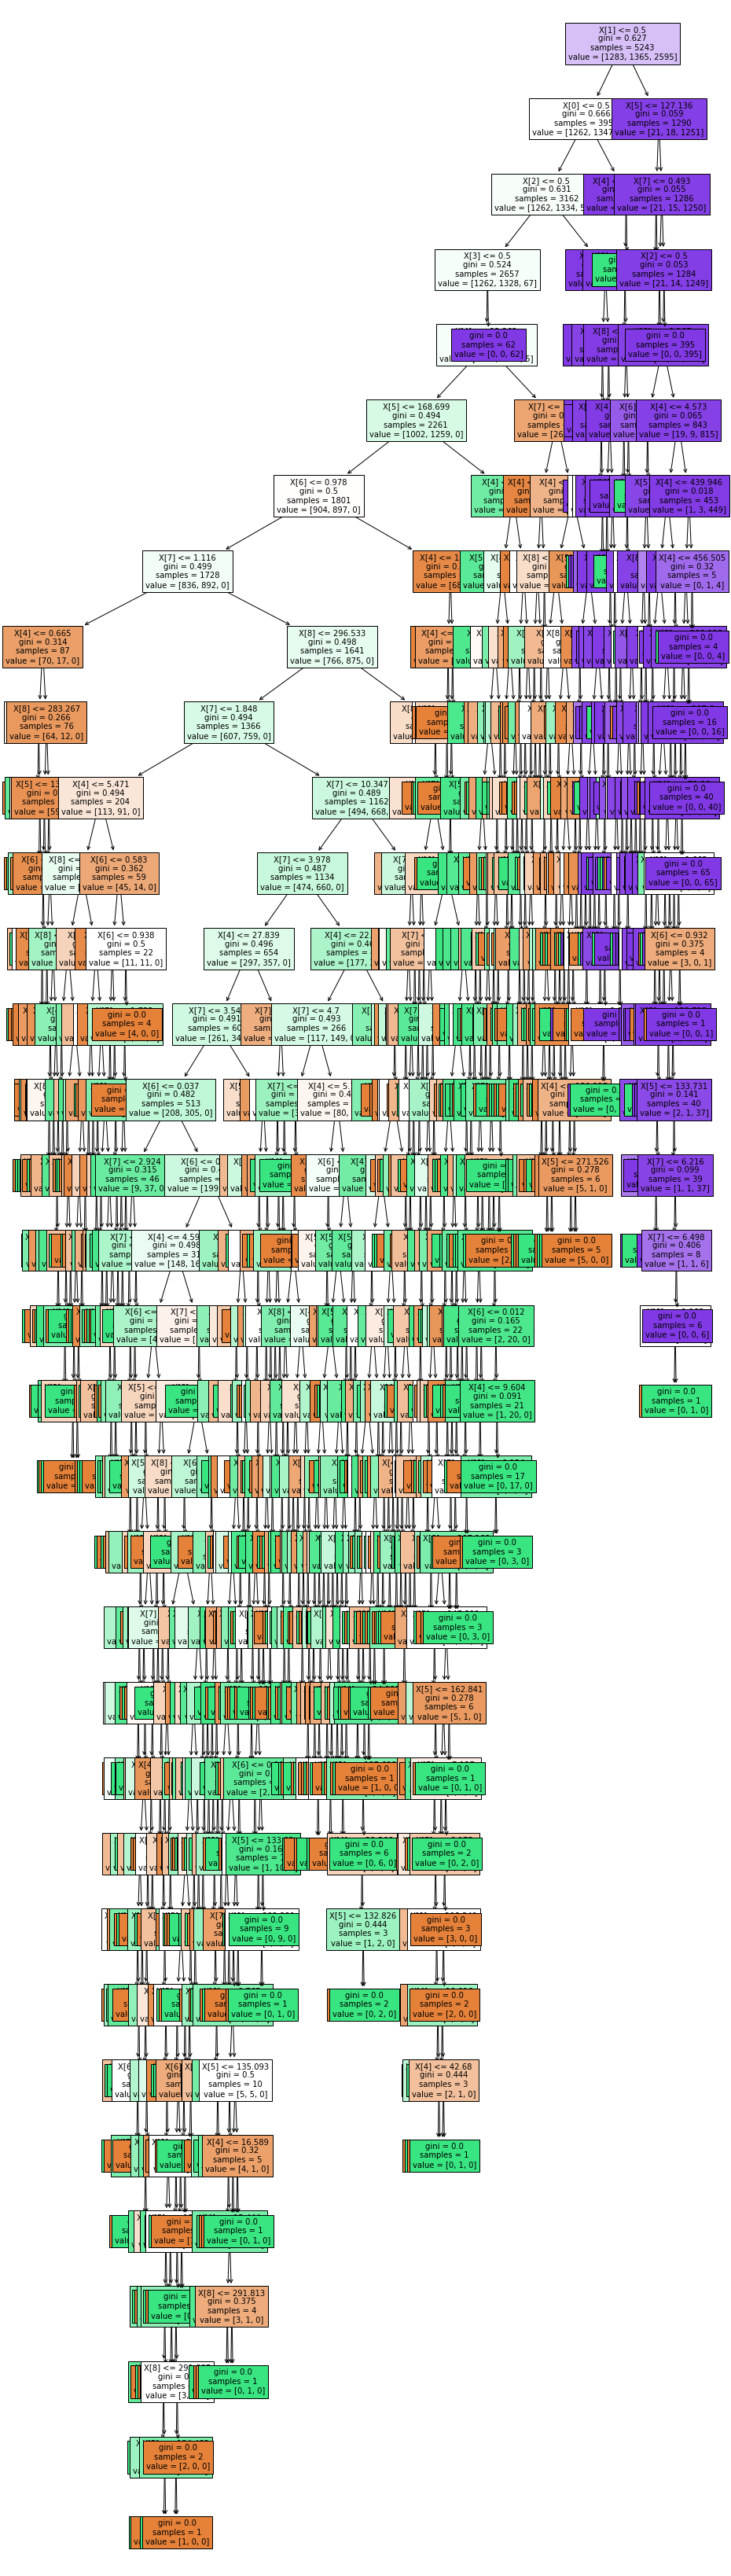

In [52]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,60))
tree.plot_tree(one, fontsize=10, filled=True)
plt.show()

In [53]:
X.columns[1] # this is the most important variable

'koi_fpflag_ss'

In [54]:
# Classification report
from sklearn.metrics import classification_report
print(classification_report(encoded_y_test, predictions, 
                            target_names = ["Confirmed", "False Positive", "Candidate"]))

                precision    recall  f1-score   support

     Confirmed       0.62      0.56      0.59       404
False Positive       0.62      0.67      0.64       435
     Candidate       0.99      1.00      0.99       909

      accuracy                           0.81      1748
     macro avg       0.74      0.74      0.74      1748
  weighted avg       0.81      0.81      0.81      1748



In [72]:
# confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(encoded_y_test, predictions)

array([[224, 179,   1],
       [127, 300,   8],
       [  1,   1, 907]], dtype=int64)

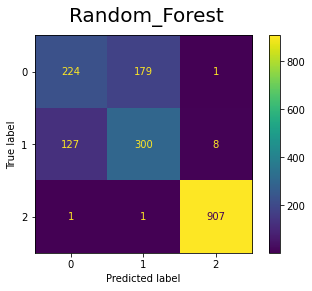

In [73]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model, X_test_scaled, encoded_y_test)
plt.suptitle('Random_Forest', fontsize=20)
plt.savefig('RFGuarneros.png')

# Hyperparameter Tuning¶

Use GridSearchCV to tune the model's parameters


In [57]:

# Create the GridSearchCV model
# Create the GridSearch estimator along with a parameter object containing the values to adjust
from sklearn.model_selection import GridSearchCV
param_grid = {'criterion': ['gini', 'entropy'],
             'n_estimators':[100,500,1000]}
grid = GridSearchCV(model, param_grid, verbose=3)

In [58]:
# Train the model with GridSearch
grid.fit(X_train_scaled, encoded_y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] criterion=gini, n_estimators=100 ................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .... criterion=gini, n_estimators=100, score=0.826, total=   1.6s
[CV] criterion=gini, n_estimators=100 ................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.5s remaining:    0.0s


[CV] .... criterion=gini, n_estimators=100, score=0.814, total=   1.0s
[CV] criterion=gini, n_estimators=100 ................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.7s remaining:    0.0s


[CV] .... criterion=gini, n_estimators=100, score=0.809, total=   0.9s
[CV] criterion=gini, n_estimators=100 ................................
[CV] .... criterion=gini, n_estimators=100, score=0.811, total=   0.8s
[CV] criterion=gini, n_estimators=100 ................................
[CV] .... criterion=gini, n_estimators=100, score=0.808, total=   0.8s
[CV] criterion=gini, n_estimators=500 ................................
[CV] .... criterion=gini, n_estimators=500, score=0.817, total=   6.5s
[CV] criterion=gini, n_estimators=500 ................................
[CV] .... criterion=gini, n_estimators=500, score=0.815, total=   4.1s
[CV] criterion=gini, n_estimators=500 ................................
[CV] .... criterion=gini, n_estimators=500, score=0.816, total=   7.7s
[CV] criterion=gini, n_estimators=500 ................................
[CV] .... criterion=gini, n_estimators=500, score=0.806, total=   4.9s
[CV] criterion=gini, n_estimators=500 ................................
[CV] .

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:  3.3min finished


GridSearchCV(estimator=RandomForestClassifier(n_estimators=250),
             param_grid={'criterion': ['gini', 'entropy'],
                         'n_estimators': [100, 500, 1000]},
             verbose=3)

In [59]:
# Get the best parameters
print(grid.best_params_)
print(grid.best_score_)

{'criterion': 'gini', 'n_estimators': 1000}
0.8142271083329089


In [60]:
best_predict = grid.predict(X_test)

In [61]:
print(classification_report(encoded_y_test, best_predict,
                           target_names = ["Confirmed", "False Positive", "Candidate"]))

                precision    recall  f1-score   support

     Confirmed       0.48      1.00      0.65       404
False Positive       0.00      0.00      0.00       435
     Candidate       0.99      1.00      0.99       909

      accuracy                           0.75      1748
     macro avg       0.49      0.67      0.55      1748
  weighted avg       0.63      0.75      0.67      1748



d:\users\rodrigo.guarneros.ift\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Save the Model

In [74]:
# save your model by updating "your_name" with your name
# and "your_model" with your model variable
# be sure to turn this in to BCS
# if joblib fails to import, try running the command to install in terminal/git-bash
import joblib
filename = 'RandomForest_model.sav'
joblib.dump(model, filename)

['RandomForest_model.sav']